<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment (Problem 1) - Food Classifying Model (Individual)</h2><h3>AY2019/20 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import keras
import os
from keras import layers, models, optimizers, regularizers
from keras.applications import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Step 1: Data Loading

In [2]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")
img_size = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [3]:
# Remove before submission
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


## Step 2:  Develop the Image Classification Models

### Model #1

#### Baseline Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        9248      
____

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
335/375 [=========================>....] - ETA: 19s - loss: 2.1958 - acc: 0.1664

In [ ]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Overfitted Model

In [ ]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.summary()

In [ ]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [8]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
co

In [9]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == "mixed6":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False

print("Before")
print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
print("After")
model.summary()










_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 24,163,498
Trainable params: 2,360,714
Non-trainable params: 21,802,784
_________________________________________________________________


In [10]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 19,673,354
Non-trainable params: 6,850,848
_________________________________________________________________



In [11]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
375/375 [==============================] - 88s 235ms/step - loss: 2.3542 - acc: 0.4576 - val_loss: 14.3443 - val_acc: 0.1035
Epoch 2/20
375/375 [==============================] - 77s 205ms/step - loss: 1.8435 - acc: 0.6117 - val_loss: 3.1553 - val_acc: 0.5690
Epoch 3/20
375/375 [==============================] - 92s 244ms/step - loss: 1.6927 - acc: 0.6567 - val_loss: 6.5521 - val_acc: 0.4420
Epoch 4/20
375/375 [==============================] - 84s 225ms/step - loss: 1.6040 - acc: 0.6873 - val_loss: 3.1732 - val_acc: 0.5945
Epoch 5/20
375/375 [==============================] - 83s 221ms/step - loss: 1.5104 - acc: 0.7064 - val_loss: 5.4721 - val_acc: 0.4840
Epoch 6/20
375/375 [==============================] - 87s 232ms/step - loss: 1.5057 - acc: 0.7104 - val_loss: 5.2022 - val_acc: 0.4930
Epoch 7/20
375/375 [==============================] - 83s 221ms/step - loss: 1.5200 - acc: 0.72

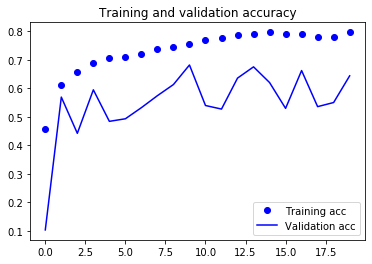

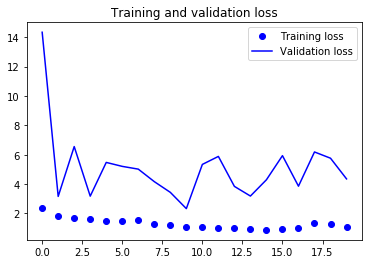

In [12]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [ ]:
# Model #1
# model.load_weights('food_model_1.h5')
# test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
# print('test_loss:', test_loss)
# print('test_acc:', test_acc)


In [16]:
# Model #2
model.load_weights('food_model_2.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


test_acc: 0.6340000057220458


In [17]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [24]:
# Load the model
model.load_weights('food_model_best.h5')

In [25]:
# Load the food list (in alphabetical order)
with open('19.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'beet_salad', 'croque_madame', 'frozen_yogurt', 'grilled_cheese_sandwich', 'grilled_salmon', 'lobster_bisque', 'omelette', 'red_velvet_cake', 'risotto']


In [28]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

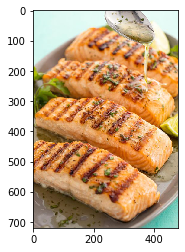

The prediction is:  grilled_salmon 

    beef_carpaccio    beet_salad  croque_madame  frozen_yogurt  \
0    5.032284e-09  6.239665e-26   1.080591e-35            0.0   

   grilled_cheese_sandwich  grilled_salmon  lobster_bisque      omelette  \
0             1.278792e-11             1.0             0.0  4.705628e-07   

   red_velvet_cake       risotto  
0     5.233542e-18  1.610355e-23  


In [36]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'salmon3.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)